## Importing the relevant packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.ffill()

In [4]:
df_comp['market_value']=df_comp.ftse #ftse

In [6]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF

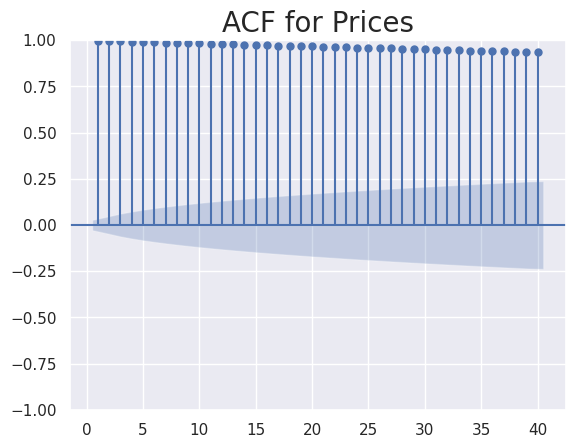

In [7]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

## The PACF

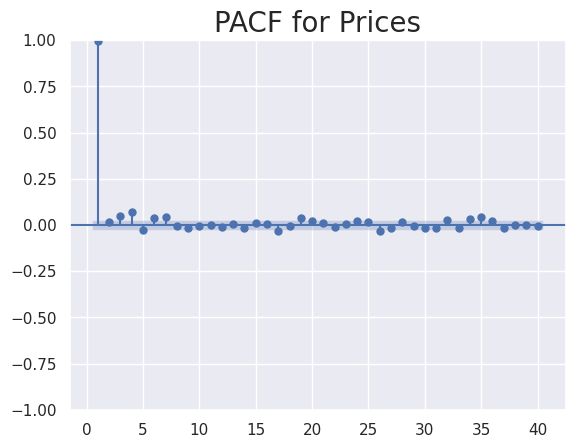

In [8]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

## The AR(1) Model

In [27]:
from statsmodels.tsa.arima.model import ARIMA

# Reemplaza ARMA por ARIMA
model_ar = ARIMA(df["market_value"], order=(1,0,0))


In [28]:
results_ar = model_ar.fit()

In [29]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Wed, 21 Feb 2024   AIC                          55251.207
Time:                        20:45:08   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6374    423.329     12.023      0.000    4259.929    5919.346
ar.L1          0.9984      0.001   1147.578      0.000       0.997       1.000
sigma2      3511.3841     40.874     85.907      0.000    3431.272    3591.496
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):              3313.33
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag AR Models

In [30]:
model_ar_2 = ARIMA(df["market_value"], order=(2,0,0))
# model_ar_2 = ARMA(df.market_value, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.949
Date:                Wed, 21 Feb 2024   AIC                          55251.898
Time:                        20:47:23   BIC                          55277.984
Sample:                    01-07-1994   HQIC                         55261.039
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    368.251     13.821      0.000    4367.881    5811.400
ar.L1          0.9811      0.010     99.868      0.000       0.962       1.000
ar.L2          0.0171      0.010      1.749      0.080      -0.002       0.036
sigma2      3510.1277     41.037     85.535      0.000    3429.696    3590.560
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3282.81
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
model_ar_3 = ARIMA(df["market_value"], order=(3,0,0))
# model_ar_3 = ARMA(df.market_value, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27615.962
Date:                Wed, 21 Feb 2024   AIC                          55241.925
Time:                        20:48:31   BIC                          55274.532
Sample:                    01-07-1994   HQIC                         55253.351
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    378.583     13.444      0.000    4347.631    5831.651
ar.L1          0.9802      0.010     99.076      0.000       0.961       1.000
ar.L2         -0.0309      0.013     -2.315      0.021      -0.057      -0.005
ar.L3          0.0489      0.009      5.383      0.000       0.031       0.067
sigma2      3502.2643     41.020     85.379      0.000    3421.866    3582.662
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3286.97
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model_ar_4 = ARIMA(df["market_value"], order=(4,0,0))
# model_ar_4 = ARMA(df.market_value, order=[4,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Wed, 21 Feb 2024   AIC                          55217.359
Time:                        20:48:28   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.960     12.985      0.000    4321.414    5857.868
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.033      -0.055      -0.002
ar.L3         -0.0224      0.013     -1.784      0.074      -0.047       0.002
ar.L4          0.0728      0.009      8.033      0.000       0.055       0.091
sigma2      3484.0262     41.922     83.108      0.000    3401.861    3566.191
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3044.18
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## LLR Test

In [33]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## Comparing Higher-Lag AR Models

 H0 los modelos son iguales

In [34]:
LLR_test(results_ar_2, results_ar_3)

0.001

In [35]:
LLR_test(results_ar_3, results_ar_4)

0.0

In [37]:
model_ar_4 = ARIMA(df["market_value"], order=(4,0,0))
# model_ar_4 = ARMA(df.market_value, order=[4,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(results_ar_3, results_ar_4)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Wed, 21 Feb 2024   AIC                          55217.359
Time:                        22:07:37   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.960     12.985      0.000    4321.414    5857.868
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.0

In [38]:
model_ar_5 = ARIMA(df["market_value"], order=(5,0,0))
# model_ar_5 = ARMA(df.market_value, order=(5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_4, results_ar_5)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -27600.460
Date:                Wed, 21 Feb 2024   AIC                          55214.920
Time:                        22:07:56   BIC                          55260.570
Sample:                    01-07-1994   HQIC                         55230.916
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    386.229     13.178      0.000    4332.646    5846.636
ar.L1          0.9788      0.010     97.867      0.000       0.959       0.998
ar.L2         -0.0293      0.013     -2.176      0.0

In [39]:
model_ar_6 = ARIMA(df["market_value"], order=(6,0,0))
# model_ar_6 = ARMA(df.market_value, order=(6,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_5, results_ar_6)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -27596.587
Date:                Wed, 21 Feb 2024   AIC                          55209.174
Time:                        22:08:15   BIC                          55261.345
Sample:                    01-07-1994   HQIC                         55227.455
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    396.932     12.822      0.000    4311.669    5867.613
ar.L1          0.9800      0.010     96.873      0.000       0.960       1.000
ar.L2         -0.0333      0.014     -2.438      0.0

In [40]:
model_ar_7 = ARIMA(df["market_value"], order=(7,0,0))
# model_ar_7 = ARMA(df.market_value, order=(7,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_6, results_ar_7)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -27592.022
Date:                Wed, 21 Feb 2024   AIC                          55202.044
Time:                        22:08:32   BIC                          55260.736
Sample:                    01-07-1994   HQIC                         55222.610
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    405.380     12.555      0.000    4295.112    5884.170
ar.L1          0.9783      0.010     95.742      0.000       0.958       0.998
ar.L2         -0.0304      0.014     -2.183      0.0

In [41]:
model_ar_8 = ARIMA(df["market_value"], order=(8,0,0))
#model_ar_8 = ARMA(df.market_value, order=(8,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_7, results_ar_8)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -27591.854
Date:                Wed, 21 Feb 2024   AIC                          55203.708
Time:                        22:08:51   BIC                          55268.922
Sample:                    01-07-1994   HQIC                         55226.560
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    407.242     12.498      0.000    4291.460    5887.821
ar.L1          0.9787      0.010     95.719      0.000       0.959       0.999
ar.L2         -0.0305      0.014     -2.183      0.0

In [42]:
print("LLR test: " + str(LLR_test(results_ar, results_ar_7, DF = 6)))

LLR test: 0.0


## Analysing the Residuals

In [44]:
df['res_price'] = results_ar_7.resid

/tmp/ipykernel_689/794269739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_price'] = results_ar_7.resid


In [45]:
sts.adfuller(df.res_price)

(-76.05339410354323,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 54842.15874022058)

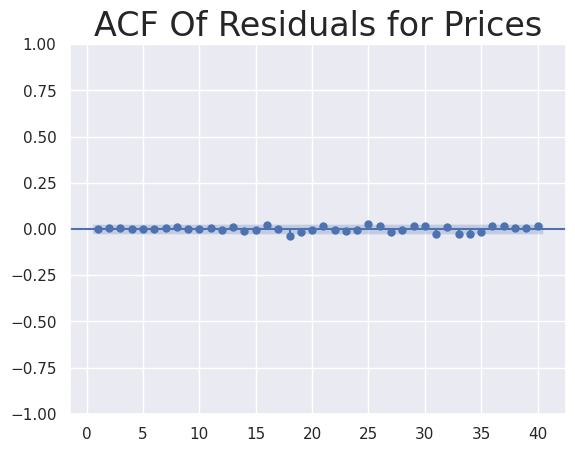

In [46]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()

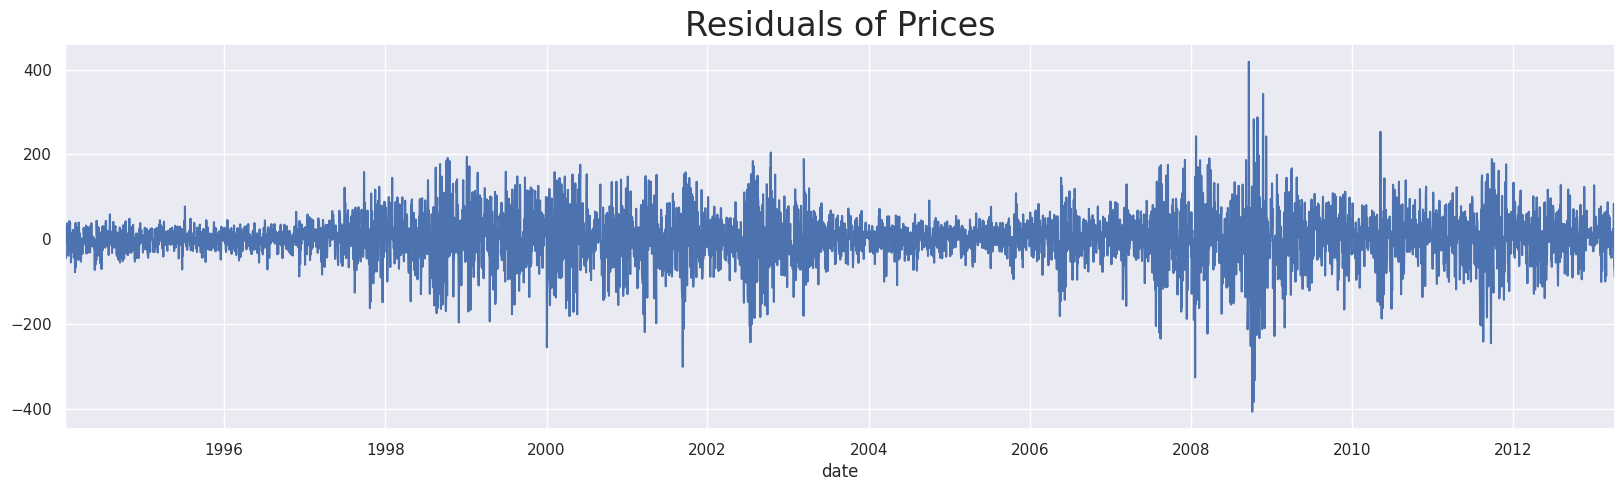

In [47]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()